In [2]:
# TensorFlow와 Keras, NumPy 불러오기
import tensorflow as tf
from keras.models import Sequential  # 순차적으로 층을 쌓는 모델
from keras.layers import Dense, Input  # 완전연결층(Dense), 입력 정의(Input)
from keras import optimizers  # 옵티마이저 구성에 사용 (예: SGD, Adam)
import numpy as np  # 수치 연산 및 배열 처리

상관계수 :  [[1.         0.98084935]
 [0.98084935 1.        ]]


2025-09-11 17:42:28.941061: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-11 17:42:28.941281: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-11 17:42:28.941297: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-11 17:42:28.942018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-11 17:42:28.942235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

None


2025-09-11 17:42:29.334701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - loss: 0.1316 - mse: 0.1316
[0.131562739610672, 0.131562739610672]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측값 :  [1.2016517 2.2163353 3.2310185 4.245702  5.2603855]
실제값 :  [1.2 2.  3.  3.5 5.3]
설명력 :  0.932738883136109


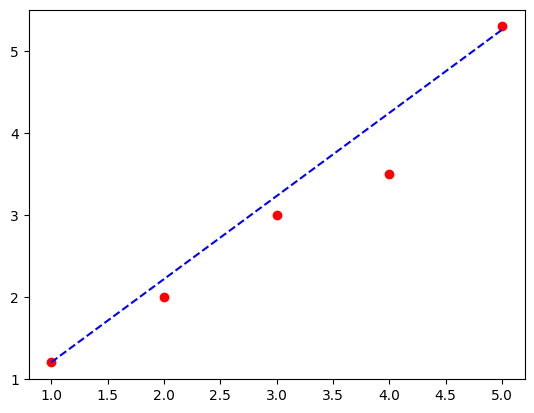

In [3]:
# 간단한 선형 회귀(신경망) 예제
x_data = np.array([1., 2., 3., 4., 5.]).reshape(-1,1)  # 입력 특성(샘플 5개, 1차원)
y_data = np.array([1.2, 2.0, 3.0, 3.5, 5.3]).reshape(-1,1)  # 타깃 값(연속형)
print('상관계수 : ', np.corrcoef(x_data.ravel(), y_data.ravel()))  # 선형 상관 확인

# 모델 구성
model = Sequential()
model.add(Input(shape=(1,)))  # 입력 차원 1
model.add(Dense(units=32, activation='relu'))  # 은닉층 1: ReLU 활성화
model.add(Dense(units=32, activation='relu'))  # 은닉층 2: ReLU 활성화
model.add(Dense(units=1, activation='linear'))  # 출력층: 회귀이므로 선형(Linear)
print(model.summary())

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])  # 최적화: SGD, 손실: 평균제곱오차(MSE)
model.fit(x_data, y_data, batch_size=1, epochs=10, verbose=0, shuffle=True)  # 에폭 10, 배치 1
print(model.evaluate(x_data, y_data))  # 학습 데이터에 대한 MSE 평가

pred = model.predict(x_data)  # 예측값 계산
print('예측값 : ', pred.ravel())
print('실제값 : ', y_data.ravel())

# 결정계수(R^2)로 설명력 확인
from sklearn.metrics import r2_score
print('설명력 : ', r2_score(y_data, pred))

# 시각화: 실제값 산점도와 예측 선
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, c='r', marker='o', label='real')
plt.plot(x_data, pred, 'b--', label='pred')
plt.show()
plt.close()

